# Plots and buildings

this notebook analyzes the geometries of plots and buildings and creates a dataset that can be used for training a model

In [1]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
import pandas as pd

import geopandas as gpd
import fiona
import shapely

import matplotlib.pyplot as plt
%matplotlib inline

## Load Cadastral Data: buildings and plots

In [4]:
# params
src = r"../../../../../../../SyntheticCitiesData/"

In [ ]:
geolcf = gpd.read_file(src + "av_lv95/geopackage/av_lv95.gpkg", layer = "lcsf") # surface

In [12]:
geores = gpd.read_file(src + "av_lv95/geopackage/av_lv95.gpkg", layer = "resf") # plots

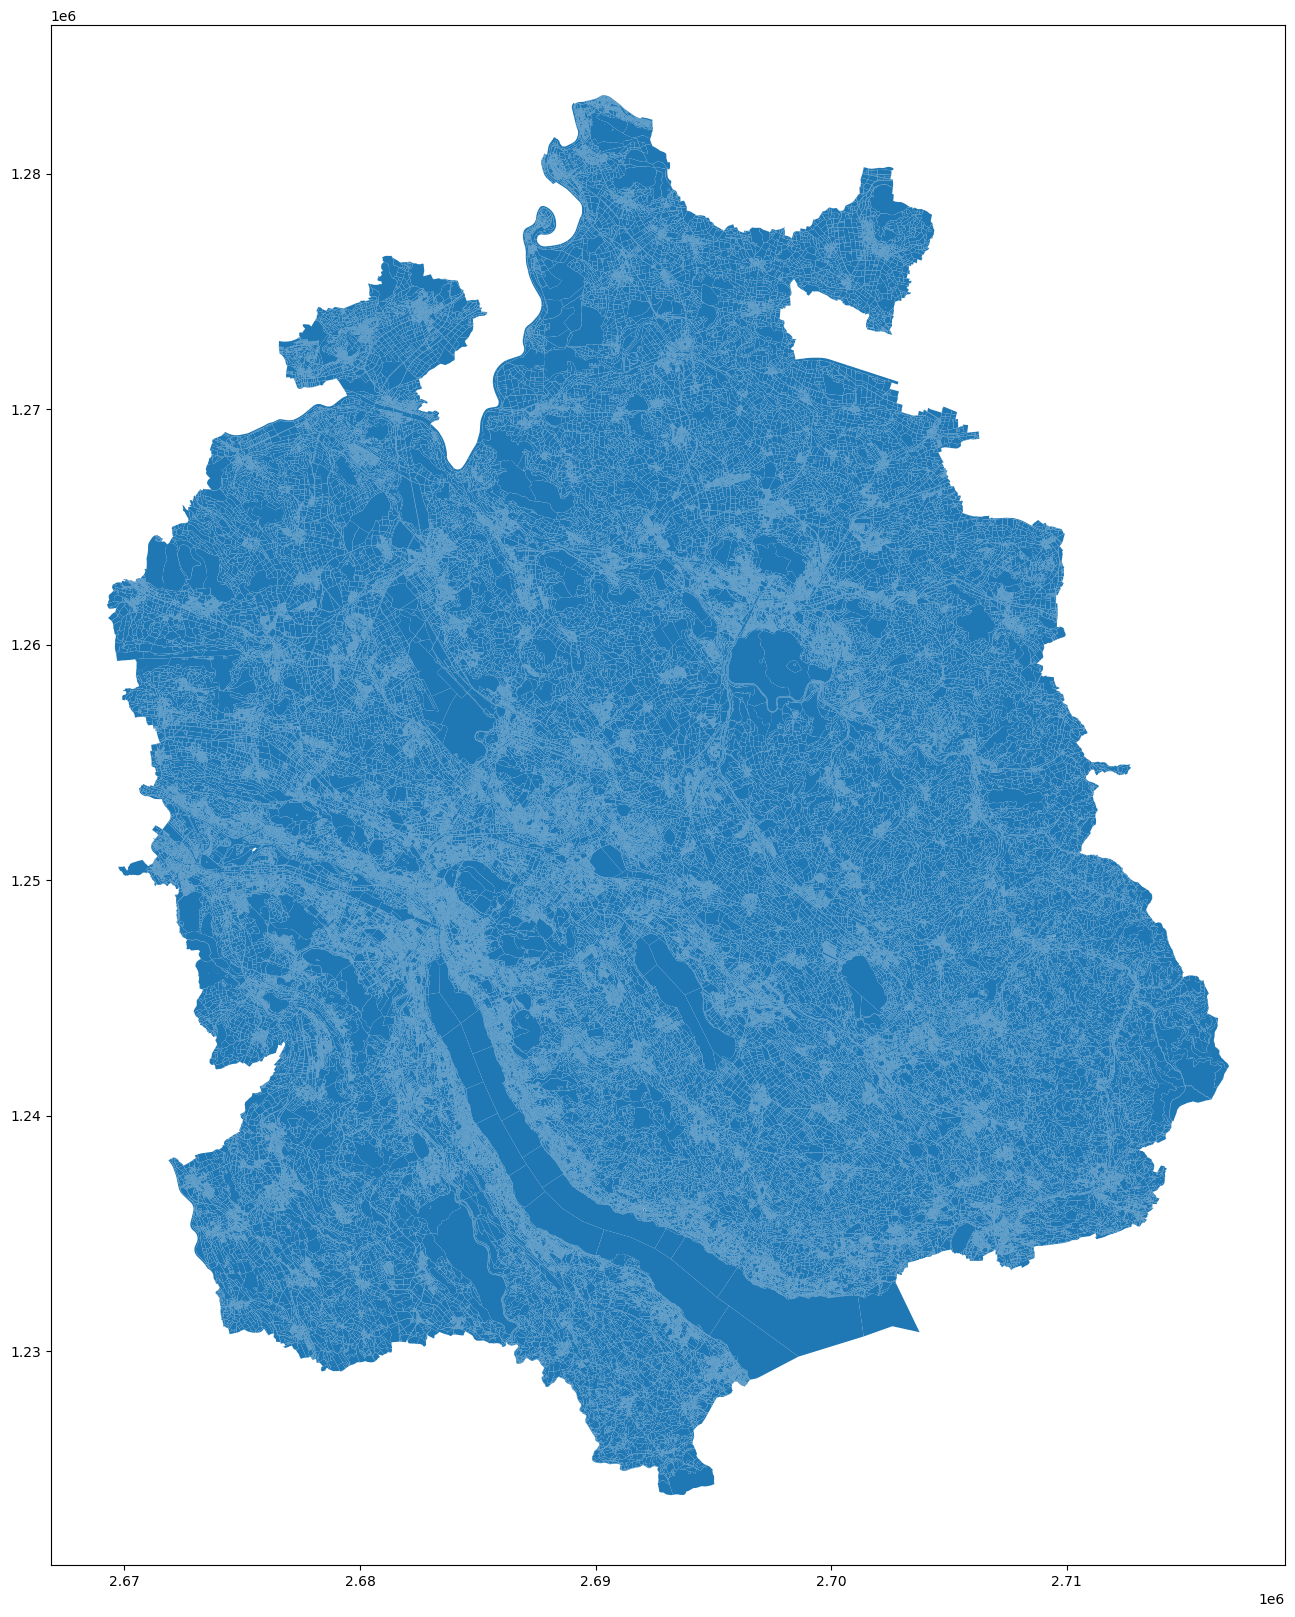

In [10]:
# geores.plot(figsize=(30,20));

In [11]:
geoplf.head()

BFSNr       NBIdent Nummer     EGRIS_EGRID Vollstaendigkeit  Flaeche  \
0     11  ZH0200000011   1325  CH219088907765     vollstaendig      520   
1     11  ZH0200000011    126  CH879077789079     vollstaendig      577   
2    152  ZH0200000152   3275  CH707714843583     vollstaendig      668   
3    152  ZH0200000152   3277  CH711484357714     vollstaendig      561   
4    152  ZH0200000152   5941  CH733577148483     vollstaendig      136   

      Gueltigkeit Kanton                                           geometry  
0  rechtskraeftig     ZH  POLYGON ((2673184.431 1237397.108, 2673193.467...  
1  rechtskraeftig     ZH  POLYGON ((2672678.721 1237398.82, 2672681.278 ...  
2  rechtskraeftig     ZH  POLYGON ((2689008.161 1238122.283, 2689018.279...  
3  rechtskraeftig     ZH  POLYGON ((2689027.433 1238104.836, 2689042.357...  
4  rechtskraeftig     ZH  POLYGON ((2688989.988 1238038.658, 2689004.923...

### Geometries in the municipality Zurich

In [13]:
geobrd = gpd.read_file(src + "swissBOUNDARIES3D_1_5_LV95_LN02.gdb/",  driver='FileGDB', layer = "TLM_HOHEITSGEBIET")
geozhc = geobrd.loc[geobrd.BFS_NUMMER == 261] # selecting Zuerich geometry to simplify the experiment

C:\Users\furio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver OpenFileGDB does not support open option DRIVER
  return ogr_read(


In [14]:
# surfaces
geolcfzh = gpd.sjoin(geolcf, geozhc, how='inner', predicate='within')
geolcfzh = geolcfzh.drop(['index_right'], axis=1)

# plots
georeszh = gpd.sjoin(geores, geozhc, how='inner', predicate='within')
georeszh = georeszh.drop(['index_right'], axis=1)

C:\Users\furio\AppData\Local\Temp\ipykernel_1588\2382698480.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2056
Right CRS: COMPD_CS["CH1903+ / LV95 + LN02 height",PROJCS["CH ...

  geolcfzh = gpd.sjoin(geolcf, geozhc, how='inner', predicate='within')
C:\Users\furio\AppData\Local\Temp\ipykernel_1588\2382698480.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2056
Right CRS: COMPD_CS["CH1903+ / LV95 + LN02 height",PROJCS["CH ...

  georeszh = gpd.sjoin(geores, geozhc, how='inner', predicate='within')


### Selecting building surfaces

In [15]:
geobldzh = geolcfzh[geolcfzh.Art == 'Gebaeude']

<Axes: >

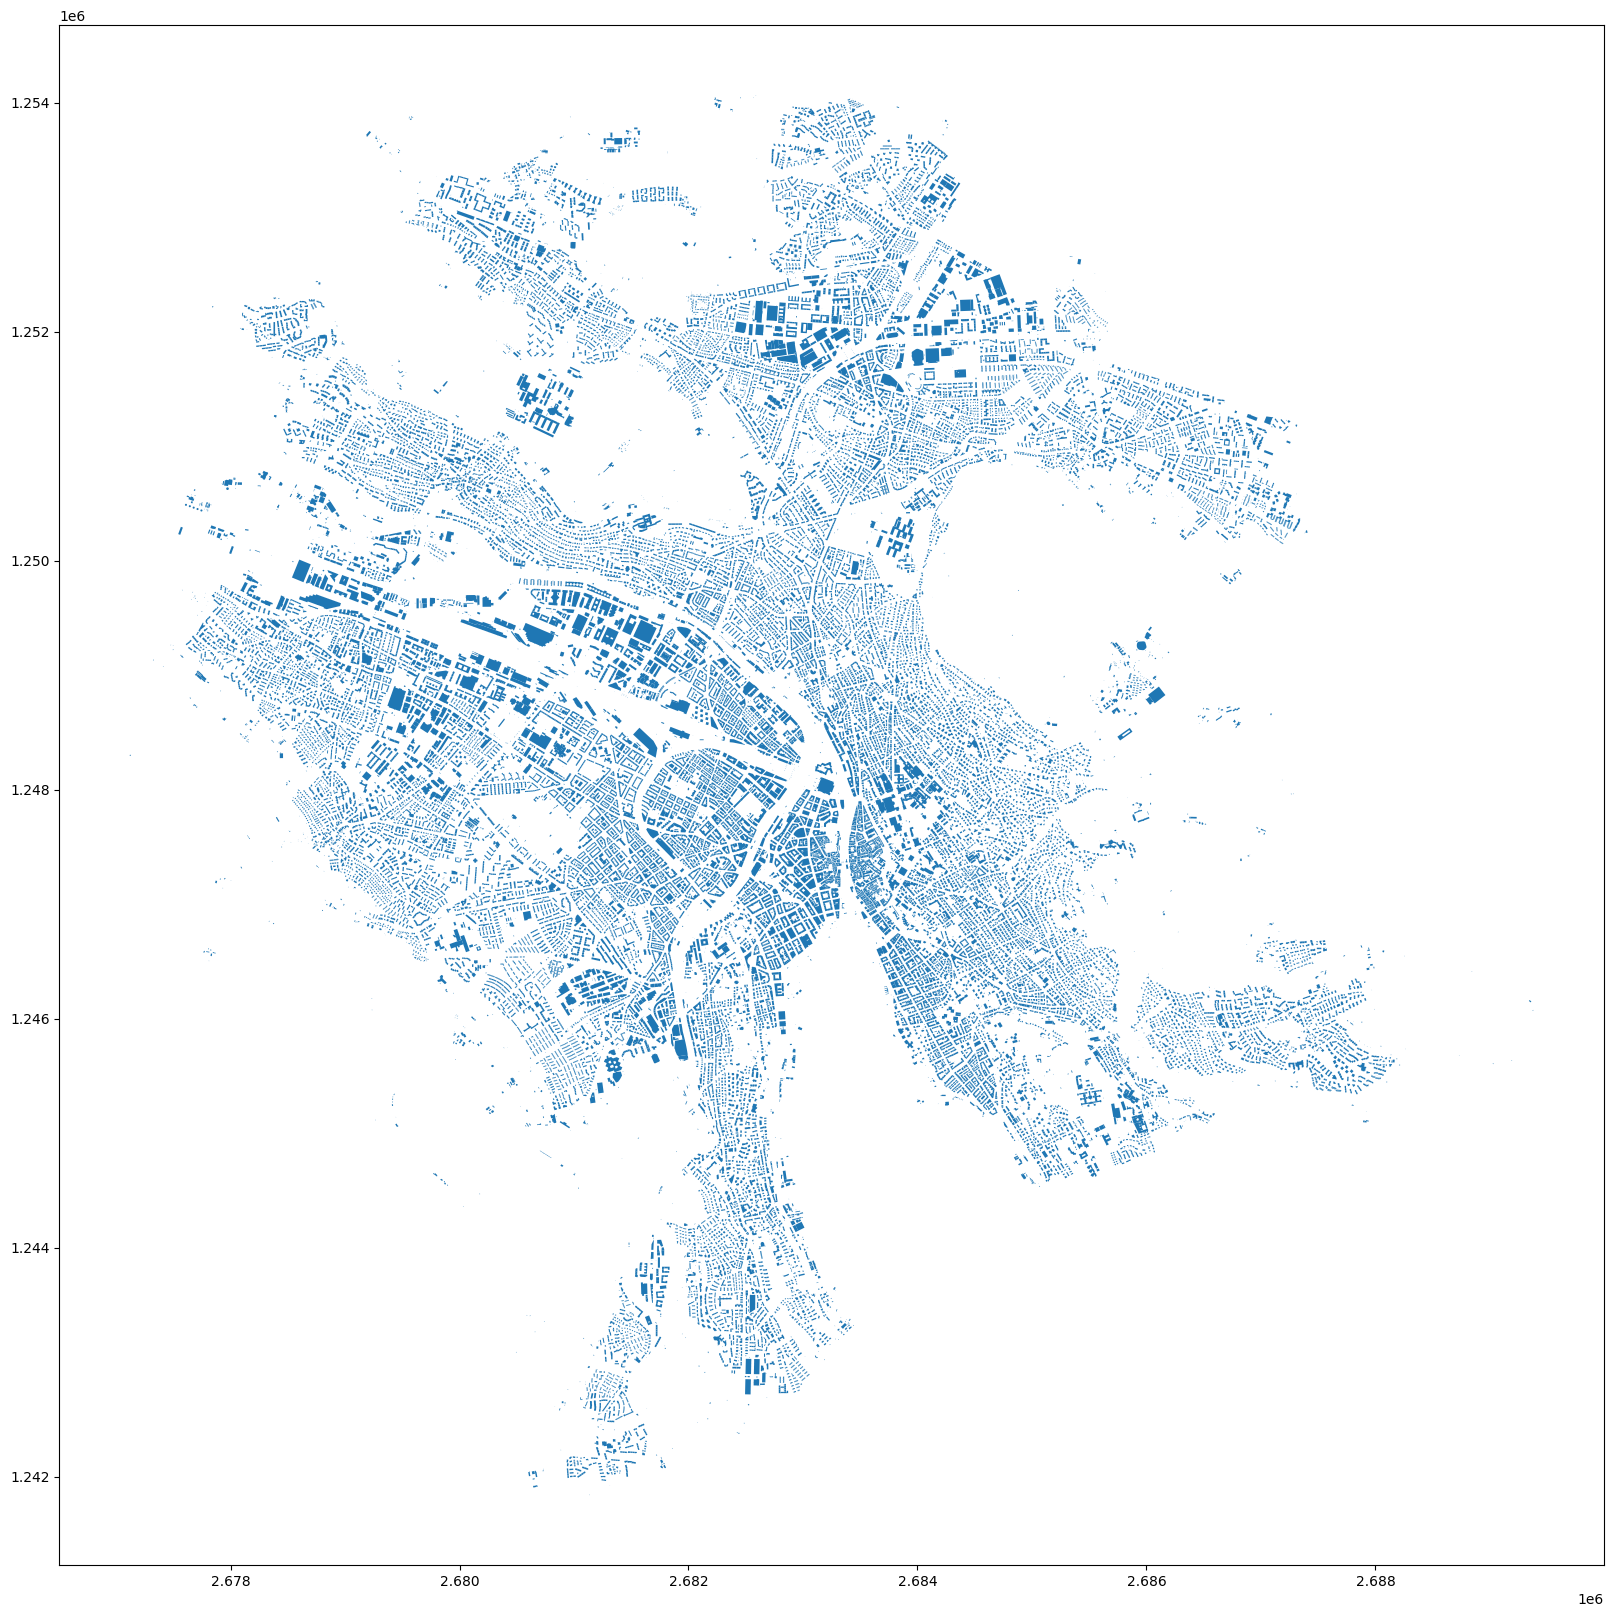

In [16]:
geobldzh.plot(figsize = (30,20));

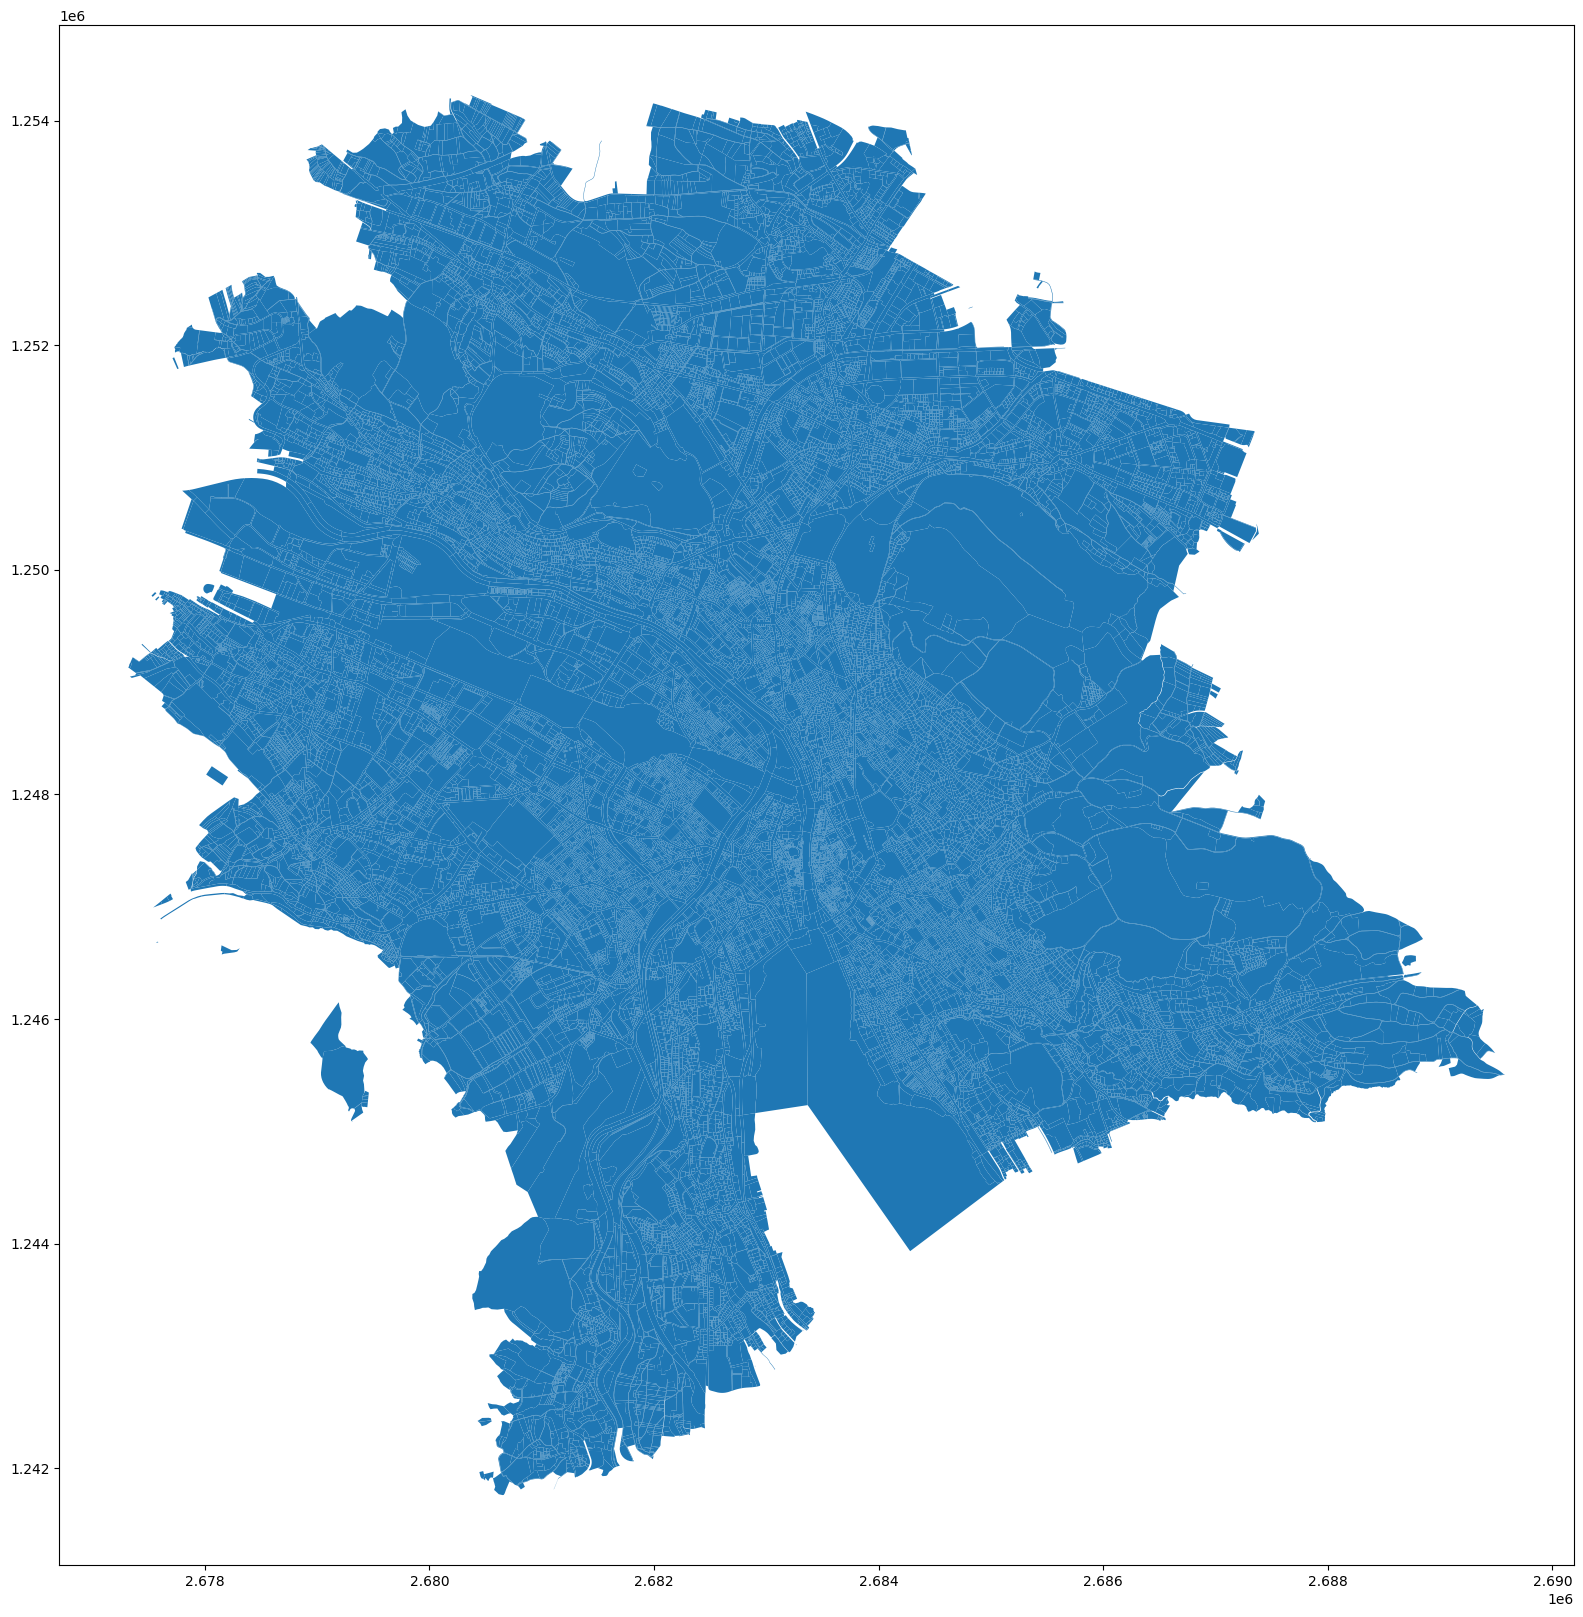

In [17]:
georeszh.plot(figsize = (30,20));

## Selecting only the plots with buildings

In [ ]:
georeszhbuilt = georeszh.geometry()

In [ ]:
georeszh.geometry.touches()

316365    POLYGON ((2684432.6 1248465.48, 2684436.074 12...
316377    POLYGON ((2683928.588 1246860.346, 2683930.462...
316378    POLYGON ((2684520.887 1248510.694, 2684530.126...
316435    POLYGON ((2684495.396 1248496.481, 2684528.381...
316436    POLYGON ((2684514.8 1248451.87, 2684515.725 12...
                                ...                        
364061    POLYGON ((2679021.845 1249378.537, 2679030.686...
364062    POLYGON ((2679070.48 1249188.125, 2679073.95 1...
364063    POLYGON ((2678974.312 1249026.994, 2678979.832...
387683    POLYGON ((2679226.755 1253351.983, 2679227.096...
387686    POLYGON ((2679344.004 1253288.05, 2679346.647 ...
Name: geometry, Length: 39316, dtype: geometry

## Counting the number of points in the plots and in the building polygons

In [18]:
# Calculate the number of points in each geometry
georeszh['num_points'] = georeszh.geometry.apply(lambda geom: len(geom.exterior.coords) if geom.geom_type == 'Polygon' else sum(len(poly.exterior.coords) for poly in geom))

# Calculate the total number of points
total_points = georeszh['num_points'].sum()

print(f"Total number of points in the geodatabase georeszh: {total_points}")

Total number of points in the geodatabase georeszh: 799483


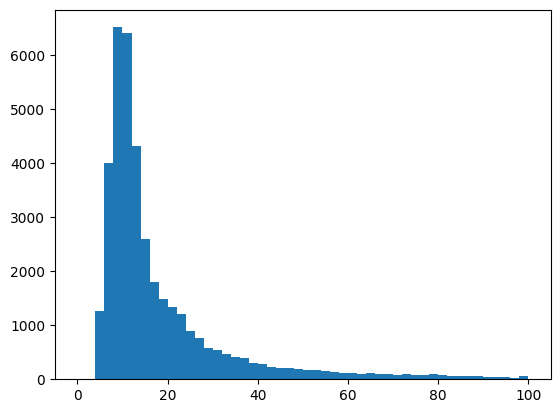

In [20]:
plt.hist(georeszh['num_points'], bins = 50, range=(0,100));

In [25]:
print(f"95% of the plots have {np.quantile(georeszh['num_points'], 0.95)} or less points")

95% of the plots have 64.0 or less points


In [24]:
np.quantile(georeszh['num_points'], 0.95)

np.float64(64.0)